In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# use statsmodels.api imported as 'sm' in another cell
data = sm.datasets.get_rdataset("AirPassengers").data
print(data.head())

          time  value
0  1949.000000    112
1  1949.083333    118
2  1949.166667    132
3  1949.250000    129
4  1949.333333    121


In [3]:
# Preparing data for time series analysis 

ts = data['value']


Text(0, 0.5, 'Frequency')

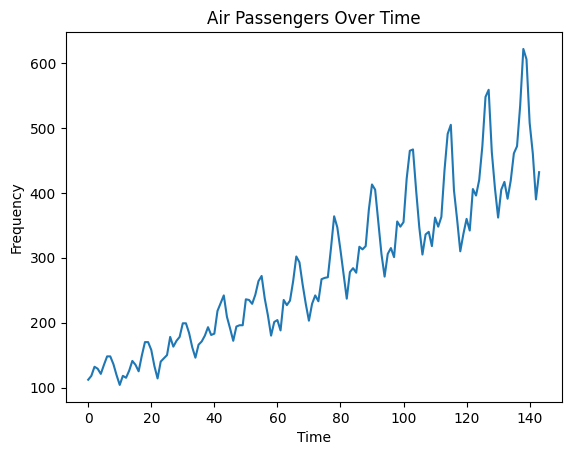

In [4]:
plt.plot(ts)
plt.title("Air Passengers Over Time")
plt.xlabel("Time")
plt.ylabel("Frequency")

In [5]:
adf_stat, p_value, *_ = adfuller(ts)

print("ADF Statistic: {adf_stat}")
print("P-value: {p_value}")

ADF Statistic: {adf_stat}
P-value: {p_value}


In [6]:
model = ARIMA(ts, order=(2, 1, 2))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 25 Feb 2026   AIC                           1353.347
Time:                        12:54:07   BIC                           1368.161
Sample:                             0   HQIC                          1359.366
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.421      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.862      0.0

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
forecast = result.forecast(steps=12)
print(forecast)

144    439.854348
145    465.295823
146    500.665624
147    535.971780
148    561.690588
149    571.315230
150    562.975296
151    539.732157
152    508.530272
153    478.148076
154    456.746519
155    449.694896
Name: predicted_mean, dtype: float64


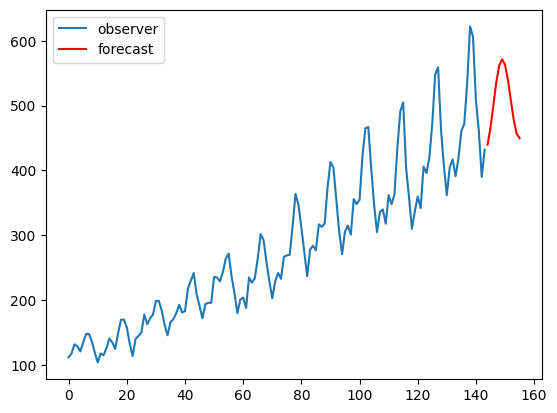

In [8]:
plt.plot(ts,label= 'observer')
plt.plot(range(len(ts), len(ts)+12), forecast, label='forecast', color='red')
plt.legend()
plt.show()